In [10]:
import os

# Set the PYDEVD_WARN_SLOW_RESOLVE_TIMEOUT environment variable to 0.6 seconds
# os.environ['PYDEVD_WARN_SLOW_RESOLVE_TIMEOUT'] = '0.7'

import torch
import matplotlib.pyplot as plt
import networkx as nx
import collections

# local
import sys
if '..' not in sys.path:
    sys.path.insert(0, '..')



from datasets.import_dataset import import_dataset
from trainer import Trainer
from utils.plotting import *
from utils import utils
import datasets.simulations as sim
import link_prediction as lp





device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'device = {device}')


%load_ext autoreload
%autoreload 2

device = cuda
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# densification for link prediction: take a subgraph that is not
# link prediction: i know some of the nodes and a bunch is dyads on which i need to predict. so take a subgraph 
# so do a densification on all of the edges you have and omitted dyads are the same

#densification. need to do a special densification here. separate between 1 and 0 after the dyads were omitted. so the dyads omittion needs to happen before the densification which makes everything ugly. why does the dyads omittion happen when it does? i think that the m


# Test Run



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 03:07:15 starting optimization of piegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 30,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 3e-06,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 2e-06,
        "noise_amp": 0.05,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_forth": 5,
        "scheduler_step_size": 1,
        "scheduler_gamma": 0.5,
        "early_stop_fit": 0,
        "first_func_in_fit": "fit_feats"
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:542:::  
in fit,
first_func_in_fit='fit_feats'
second_function_name='fit_prior'


/home/user/Doc

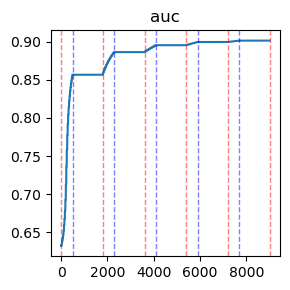



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:665:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9014628080770462


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





In [9]:
# train = 85% val = 5% test = 10%
# need to omit 15% of the nodes, then run accuracy on the 5% validation set


photo_ds = import_dataset('photo')
photo_ds.edge_index.shape

dyads_to_omit = lp.get_dyads_to_omit(photo_ds.edge_index, 0.1)
photo_ds_omitted = lp.omit_densify_split(
                            photo_ds, 
                            dyads_to_omit,
                            val_rel_size=0.0,
                            densify=True)


# todo: make densification

#todo: refactor acctracke
#todo: anomaly detection before the algorithm. what to do with the anomalous nodes

config_triplets = [
    # ['feat_opt', 'lr', 0.000001],
    # ['prior_opt', 'lr', 0.000001],
    ['back_forth','n_back_forth', 5]
                   ]

trainer_photo_ieclam = Trainer(
                        dataset=photo_ds_omitted,
                        model_name='piegam',
                        task='link_prediction',
                        config_triplets_to_change=config_triplets,
                        attr_opt=False,
                        device=device,
)

# for link prediction we need to do the densification after omitting the dyads otherwise... otherwise we need to tell the omit dyads function... why not just do the omit dyads before trainer and have the dataset omitted. that will probably be the easiest and there will be no need for edge index original and all of that crap

losses, acc_test, acc_val = trainer_photo_ieclam.train(
            init_type='small_gaus',
            init_feats=True,
            acc_every=20,
            plot_every=-1,
            verbose=False,
            verbose_in_funcs=False
        )

del photo_ds, photo_ds_omitted
torch.cuda.empty_cache()


# Grid search params



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-20 21:36:54 starting optimization of piegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 30,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-05,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 1e-05,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back_forth": 7,
        "scheduler_step_size": 1,
        "scheduler_gamma": 0.5,
        "early_stop_fit": 0,
        "first_func_in_fit": "fit_feats"
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:541:::  
in fit,
first_func_in_fit='fit_feats'
second_function_name='fit_prior'


/home/user/Docu

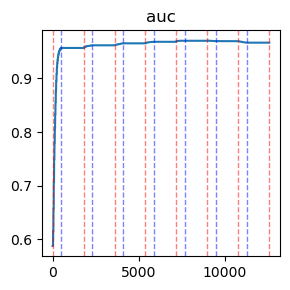



/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:664:::  
fit end, no early stopping


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9664345788093941


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-20 21:41:02 starting optimization of piegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 30,
        "dim_attr": 100,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-05,
        "n_iter": 500,
        "early_stop": 0
    },
    "prior_opt": {
        "n_iter": 1300,
        "lr": 5e-06,
        "noise_amp": 0.1,
        "weight_decay": 0.1,
        "early_stop": 0
    },
    "back_forth": {
        "n_back

UnboundLocalError: cannot access local variable 'accuracies_test' where it is not associated with a value

In [21]:
import os
import json

# train = 85% val = 5% test = 10%
# need to omit 15% of the nodes, then run accuracy on the 5% validation set
# LOOP TEST MANY HYPERS. COMMUNITIES, NOISE AMPS, ITERATIONS, LEARNING RATES
#todo: the hyperparameter classification here is different. here there will be a dictionary that is the highest value as the key and the value will be the config dict of the trainer

acc_configs = {}

iters_prior = [1300, 2000, 1000]
iters_feat = [500, 1000, 2000]
lrs_feat = [0.00001, 0.000005, 0.000001]
lrs_prior = [0.00001, 0.000005, 0.000001]
noise_amps = [0.1, 0.05, 0.01]

current_dir = os.getcwd()
file_path = os.path.join(current_dir, 'results/photo_piegam_acc_configs.txt')

# Create the file if it doesn't exist
if not os.path.exists(file_path):
    with open(file_path, 'w') as file:
        json.dump({}, file)

try:
    for noise_amp in noise_amps:
        for iter_prior in iters_prior:
            for iter_feat in iters_feat:
                for lr_feat in lrs_feat:
                    for lr_prior in lrs_prior:

                        photo_ds = import_dataset('photo')
                        photo_ds.edge_index.shape

                        dyads_to_omit = lp.get_dyads_to_omit(photo_ds.edge_index, 0.1)
                        photo_ds_omitted = lp.omit_densify_split(
                                                    photo_ds, 
                                                    dyads_to_omit,
                                                    val_rel_size=0.0,
                                                    densify=False)



                        #todo: refactor acctrack
                        #todo: anomaly detection before the algorithm. what to do with the anomalous nodes

                        config_triplets = [
                            ['feat_opt', 'lr', lr_feat],
                            ['feat_opt', 'n_iter', iter_feat],
                            ['prior_opt', 'lr', lr_prior],
                            ['prior_opt', 'noise_amp', noise_amp],
                            ['prior_opt', 'n_iter', iter_prior],
                            ['back_forth','n_back_forth', 7],
                                        ]

                        trainer_photo_ieclam = Trainer(
                                                dataset=photo_ds_omitted,
                                                model_name='piegam',
                                                task='link_prediction',
                                                config_triplets_to_change=config_triplets,
                                                attr_opt=False,
                                                device=device,
                        )

                        # for link prediction we need to do the densification after omitting the dyads otherwise... otherwise we need to tell the omit dyads function... why not just do the omit dyads before trainer and have the dataset omitted. that will probably be the easiest and there will be no need for edge index original and all of that crap

                        losses, acc_test, acc_val = trainer_photo_ieclam.train(
                                    init_type='small_gaus',
                                    init_feats=True,
                                    acc_every=20,
                                    plot_every=-1,
                                    verbose=False,
                                    verbose_in_funcs=False
                                )
                        #todo: i need a way to print nothing. verbose should be a number between 0 and 2. verbose 2 is the verbose we have now. verbose 1 is the not verbose we have now. verbose 0 is print nothing nothing.
                        #todo: change iegam to ieclam everywhere.
                        
                        last_acc = acc_test['auc'][-1]

                        


                        
                        # Append the sorted_acc_configs to the existing file
                        with open(file_path, 'r') as file:
                            loaded_acc_configs = json.load(file)

                        loaded_acc_configs.update({str(last_acc): config_triplets})

                        with open(file_path, 'w') as file:
                            json.dump(loaded_acc_configs, file)

                        acc_configs[last_acc] = config_triplets

                        del photo_ds, photo_ds_omitted
                        torch.cuda.empty_cache()
except Exception as e:
    raise e
finally:
    
    sorted_acc_configs = collections.OrderedDict(sorted(acc_configs.items(), reverse=True))
    
    # Read the contents of the file
    with open(file_path, 'r') as file:
        file_contents = file.read()    # Print the contents of the fileonf    print(file_contents)
    print(loaded_acc_configs)

    print(acc_configs)
    print(loaded_acc_configs)



In [13]:
sorted_acc_configs

OrderedDict([(0.8211206990150356,
              [['feat_opt', 'lr', 5e-05],
               ['feat_opt', 'n_iter', 14],
               ['prior_opt', 'lr', 5e-05],
               ['prior_opt', 'noise_amp', 0.1],
               ['prior_opt', 'n_iter', 13],
               ['back_forth', 'n_back_forth', 7]]),
             (0.8135114403294741,
              [['feat_opt', 'lr', 5e-05],
               ['feat_opt', 'n_iter', 14],
               ['prior_opt', 'lr', 1e-06],
               ['prior_opt', 'noise_amp', 0.1],
               ['prior_opt', 'n_iter', 13],
               ['back_forth', 'n_back_forth', 7]]),
             (0.808285119931408,
              [['feat_opt', 'lr', 5e-05],
               ['feat_opt', 'n_iter', 14],
               ['prior_opt', 'lr', 1e-06],
               ['prior_opt', 'noise_amp', 0.1],
               ['prior_opt', 'n_iter', 13],
               ['back_forth', 'n_back_forth', 7]])])

# VANILLA - Affiliation Space Dimension



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:05:43 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 76,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


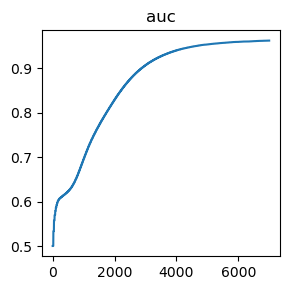



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9626665645407706


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:06:09 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 76,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


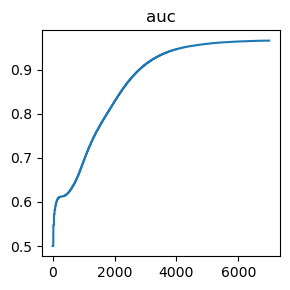



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9666080220784999


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:06:35 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 76,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


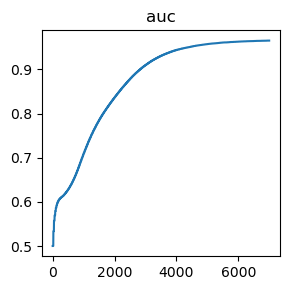



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9652665542145059


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:07:01 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 76,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


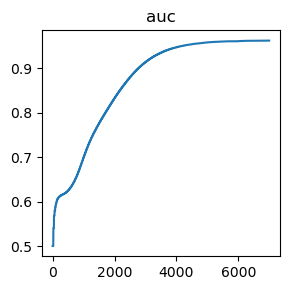



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9623579505652804


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:07:27 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 76,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


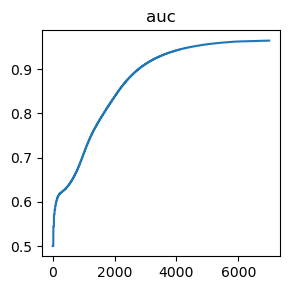



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.964669707503452


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:07:53 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 76,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


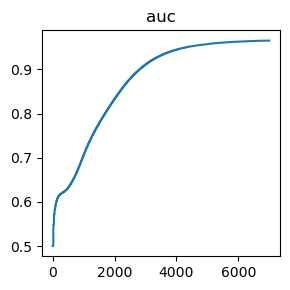



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9653873727289535


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:08:19 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 80,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


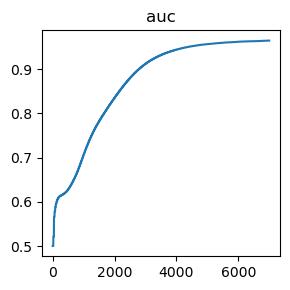



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9645585844009894


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:08:46 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 80,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


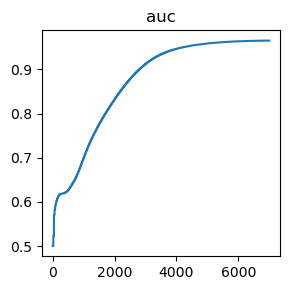



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9653933779597984


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:09:13 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 80,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


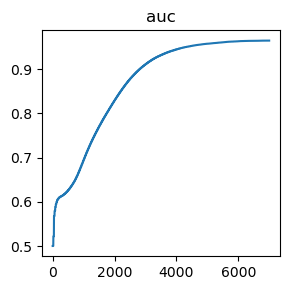



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9642814681640921


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:09:40 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 80,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


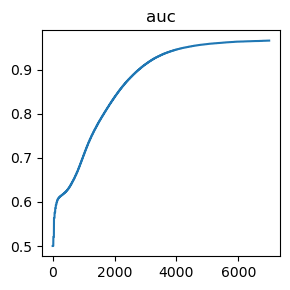



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9657631771625752


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:10:07 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 80,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


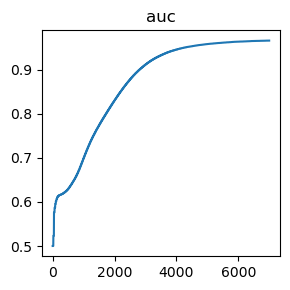



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9665524064003248


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:10:35 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 80,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


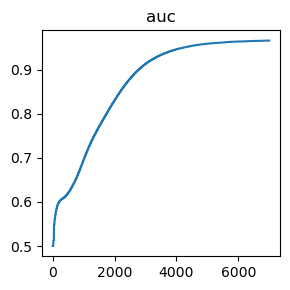



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.965595732908664


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:11:02 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 86,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


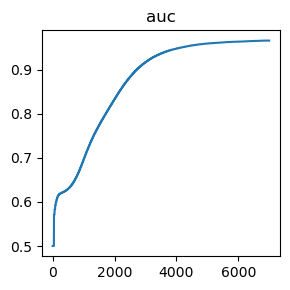



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9661726035969987


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:11:30 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 86,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


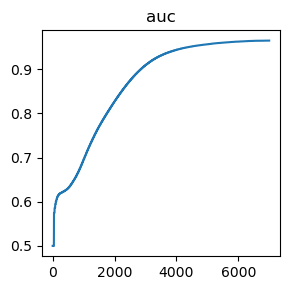



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9651424635198109


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:11:59 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 86,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


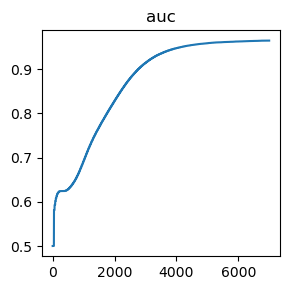



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.964348267356134


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:12:27 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 86,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


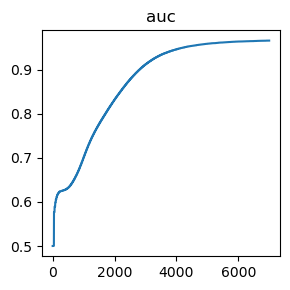



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9660505864200077


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:12:56 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 86,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


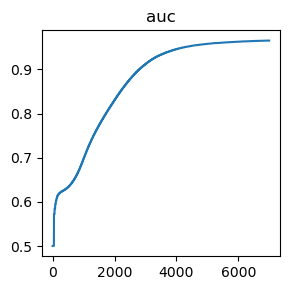



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9651076304415984


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:13:24 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 86,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


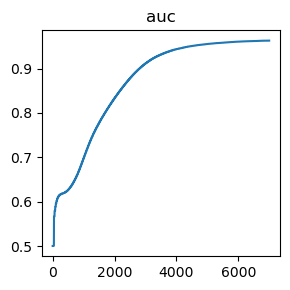



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9629016186130754


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:13:53 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 90,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


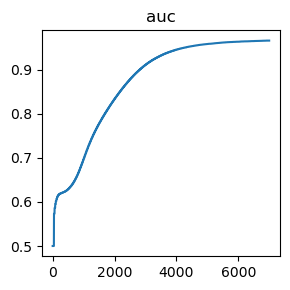



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9666001134161953


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:14:23 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 90,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


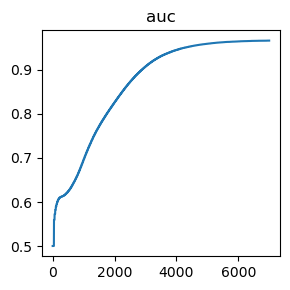



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9667587445750143


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:14:53 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 90,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


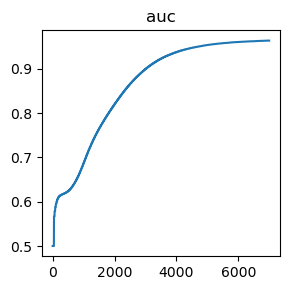



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9633157109659463


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:15:23 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 90,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


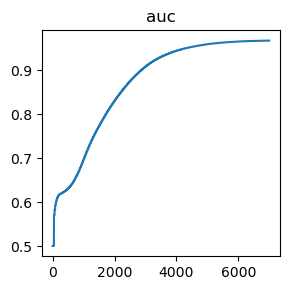



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9672554938117586


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:15:52 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 90,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


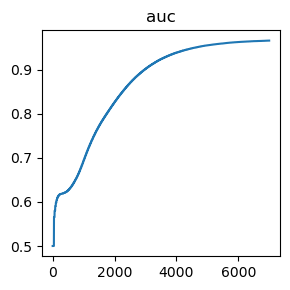



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9657897489414475


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:16:22 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 90,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


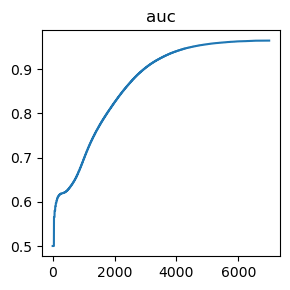



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9646970724013848


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:16:52 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 96,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


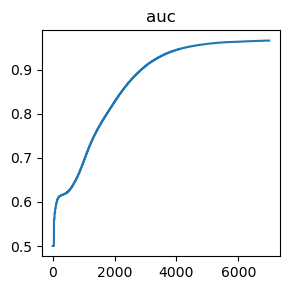



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9657577464170906


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:17:22 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 96,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


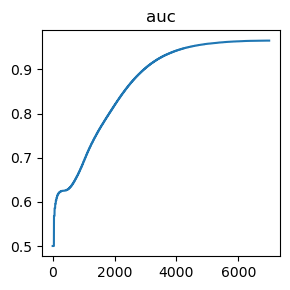



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9653063380527521


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:17:52 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 96,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


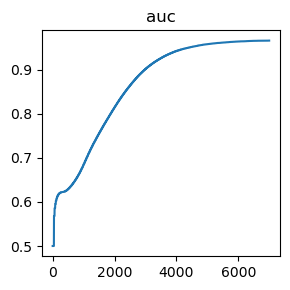



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9655122483371172


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:18:22 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 96,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


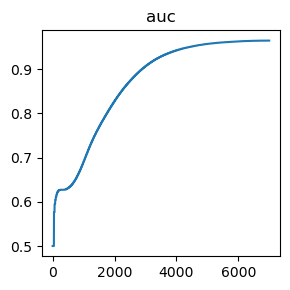



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9647708354122648


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:18:52 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 96,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


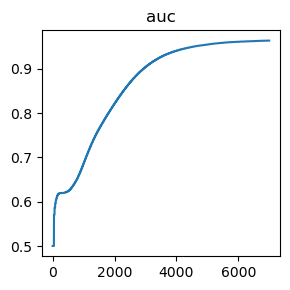



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9639997122027004


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:19:22 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 96,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


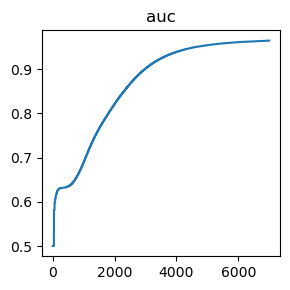



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9643969108098945


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:19:52 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 100,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


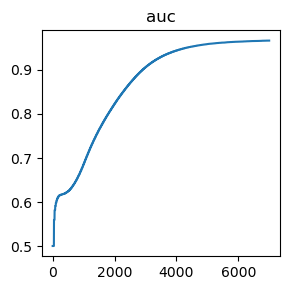



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9667991946021333


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:20:23 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 100,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


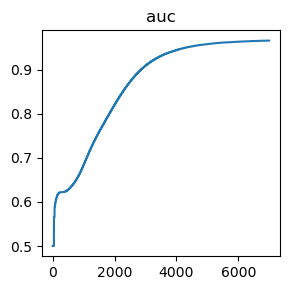



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9655137313193283


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:20:55 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 100,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


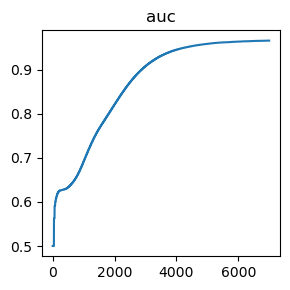



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9657775874315853


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:21:26 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 100,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


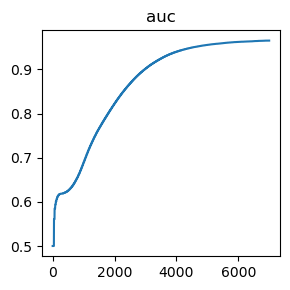



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9650782237998761


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:21:57 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 100,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


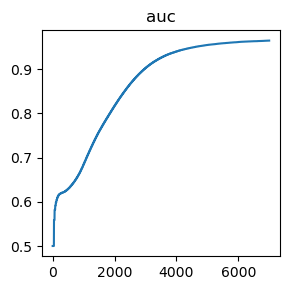



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.964225739173058


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:22:28 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 100,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


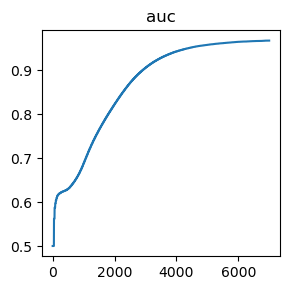



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.967268054396243


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:22:59 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 106,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


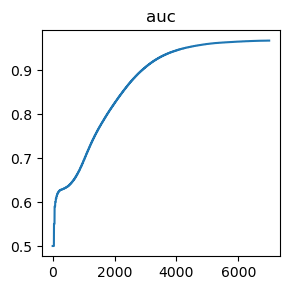



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9674086941670654


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:23:33 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 106,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


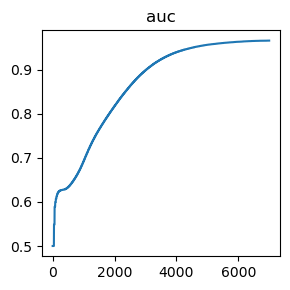



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9657767445087001


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:24:06 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 106,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


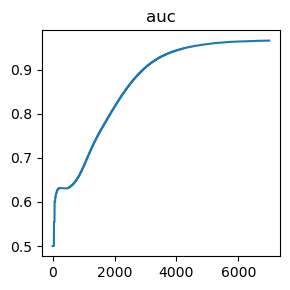



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.965781193825372


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:24:39 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 106,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


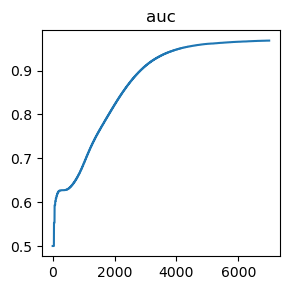



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9684938213288572


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:25:12 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 106,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


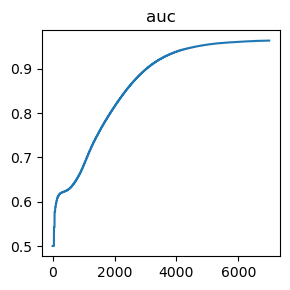



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9633313346014547


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:25:45 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 106,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


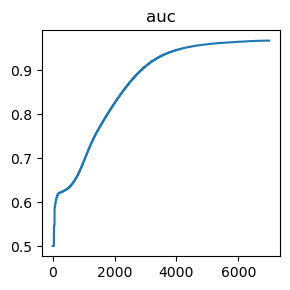



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9675553014745389


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:26:18 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 110,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


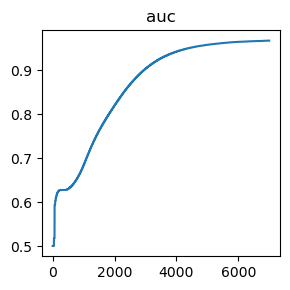



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9677226960031369


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:26:52 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 110,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


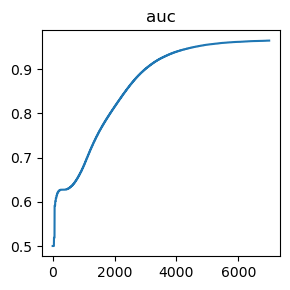



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9644217029412017


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:27:26 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 110,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


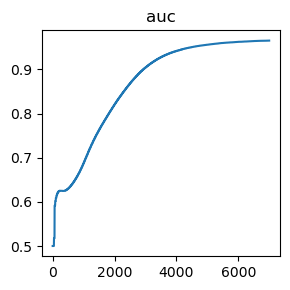



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9654429386429841


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:28:00 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 110,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


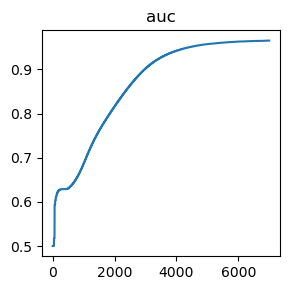



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9651491916061344


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:28:34 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 110,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


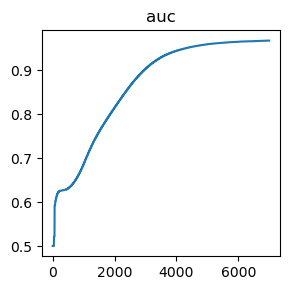



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9670861287948918


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:29:08 starting optimization of iegam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 110,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


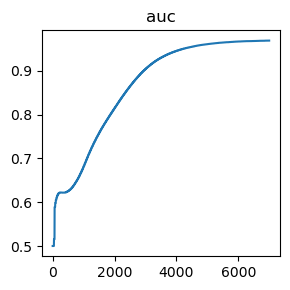



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9690728641097588


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:29:42 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 76,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


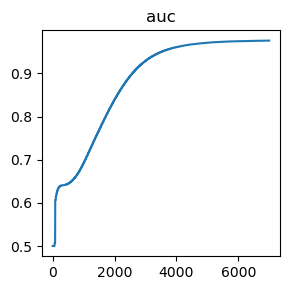



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9760585083079317


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:30:07 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 76,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


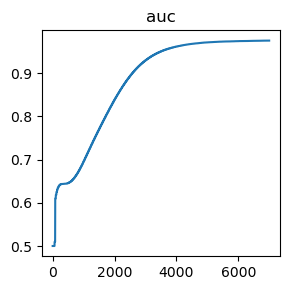



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9751550677803221


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:30:32 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 76,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


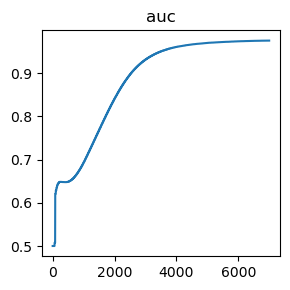



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9752740254836745


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:30:57 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 76,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


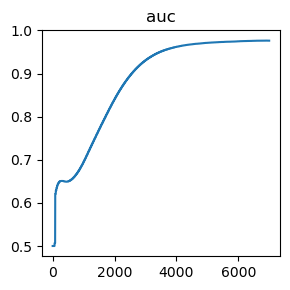



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9761504000902755


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:31:22 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 76,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


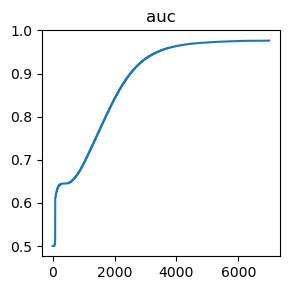



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9765044306533784


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:31:47 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 76,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


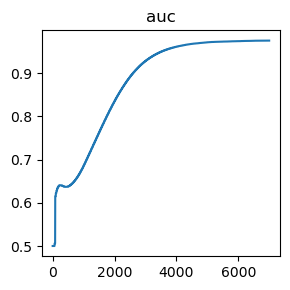



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9755638566205844


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:32:13 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 80,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


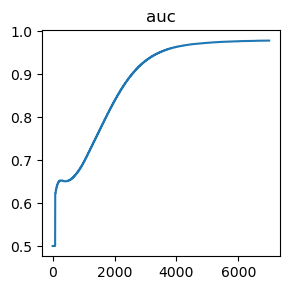



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9779096335534757


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:32:39 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 80,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


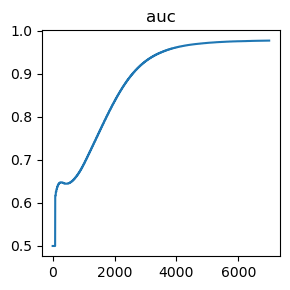



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9772516390851492


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:33:04 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 80,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


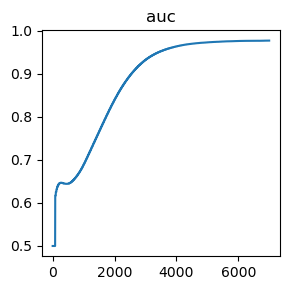



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9767298406369798


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:33:31 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 80,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


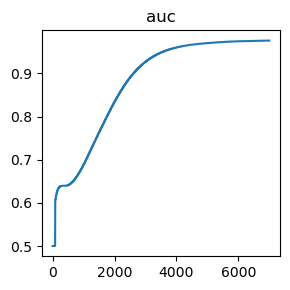



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9759968635203452


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:33:57 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 80,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


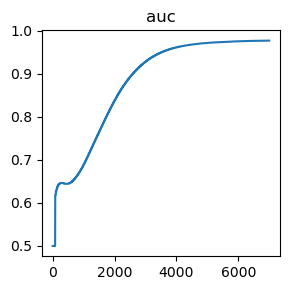



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9775204506387132


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:34:23 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 80,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


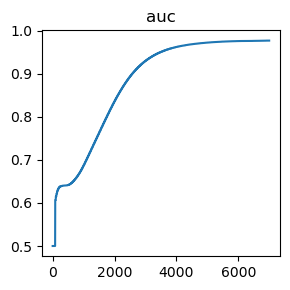



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9766521161418744


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:34:49 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 86,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


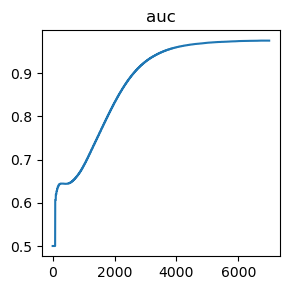



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.975353755368565


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:35:17 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 86,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


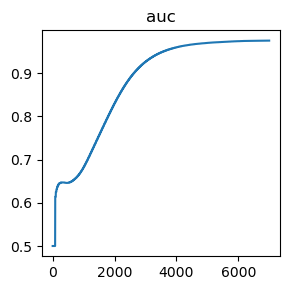



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9755959665700277


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:35:45 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 86,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


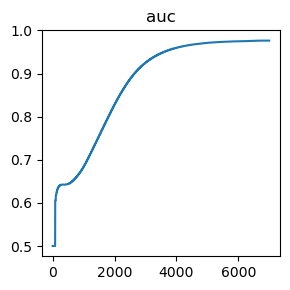



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9763112495007827


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:36:12 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 86,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


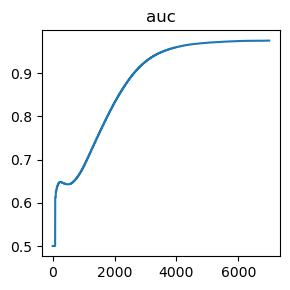



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9755867560845781


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:36:40 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 86,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


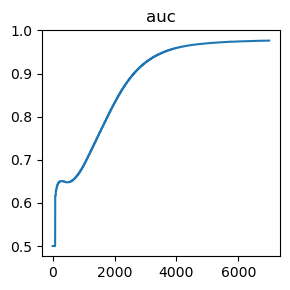



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9763377291297254


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:37:07 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 86,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


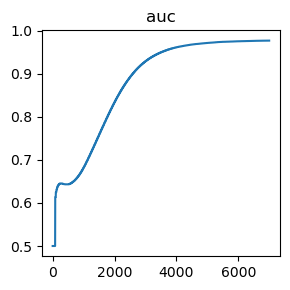



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.976660961784714


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:37:35 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 90,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


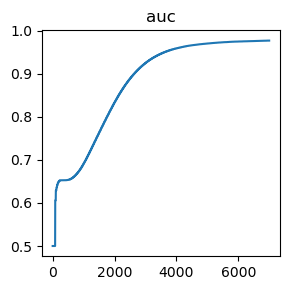



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9772222525694266


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:38:04 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 90,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


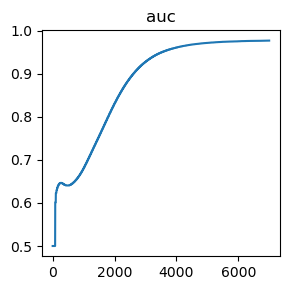



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9772743991818302


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:38:33 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 90,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


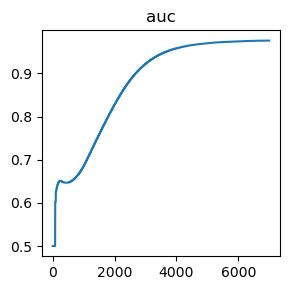



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9758931083358746


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:39:02 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 90,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


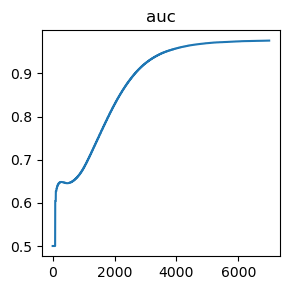



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9759250248963505


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:39:31 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 90,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


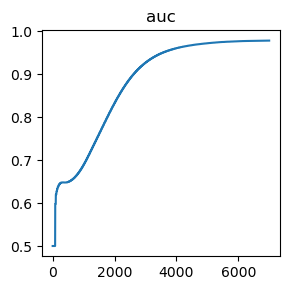



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9776696918171662


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:40:00 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 90,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


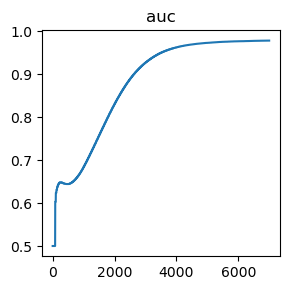



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9781932305003225


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:40:29 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 96,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


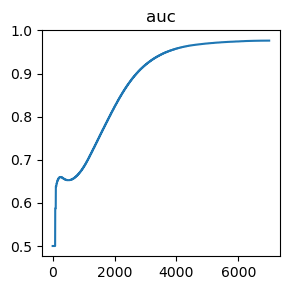



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9763018721656667


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:40:59 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 96,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


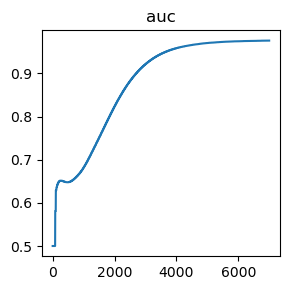



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9760684082080773


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:41:28 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 96,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


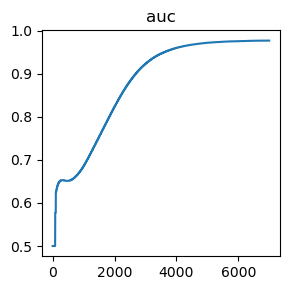



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9771004583471874


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:41:58 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 96,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


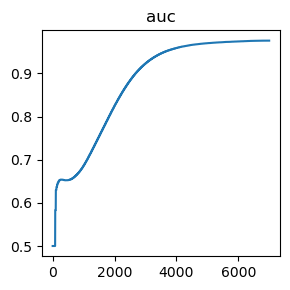



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9760670148507271


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:42:28 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 96,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


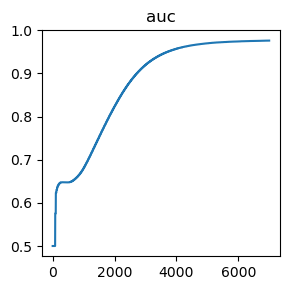



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9762062120864196


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:42:57 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 96,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


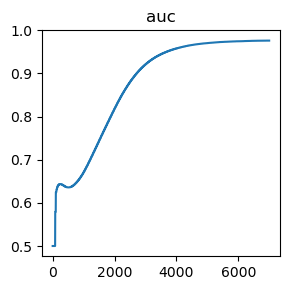



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9761877127702079


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:43:27 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 100,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


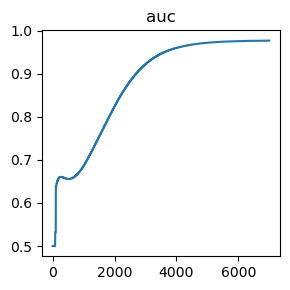



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9767969533611577


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:43:58 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 100,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


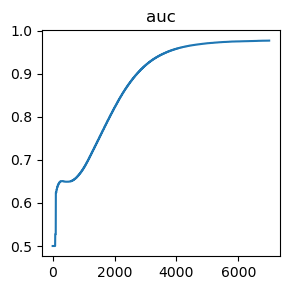



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9769226419770736


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:44:28 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 100,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


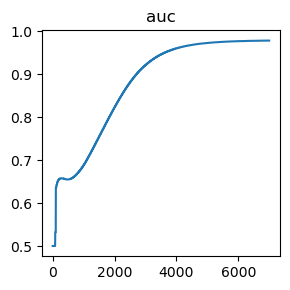



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.977971701958779


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:44:59 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 100,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


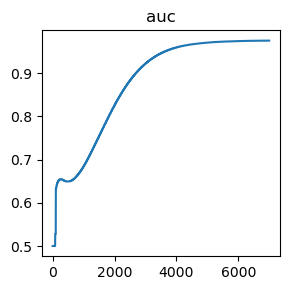



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9756477665629288


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:45:29 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 100,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


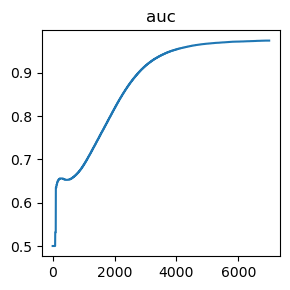



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9741368940848681


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:46:00 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 100,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


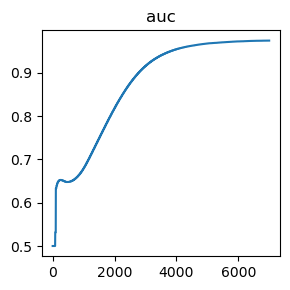



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9746078677596628


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:46:31 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 106,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


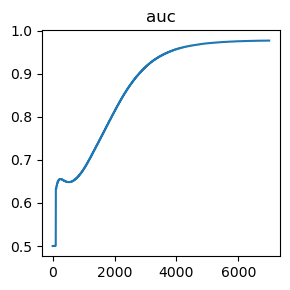



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9773886110604628


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:47:03 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 106,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


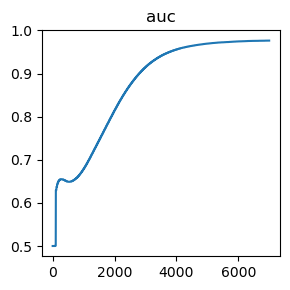



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9765089003478816


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:47:36 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 106,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


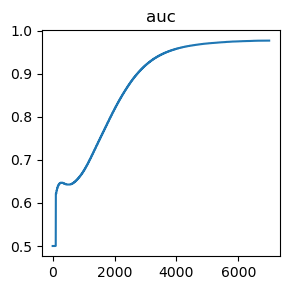



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9769877446573276


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:48:08 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 106,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


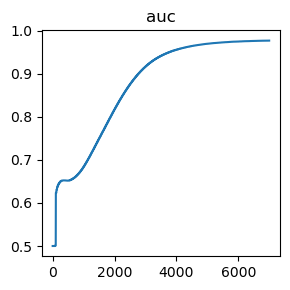



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9771508674692393


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:48:41 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 106,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


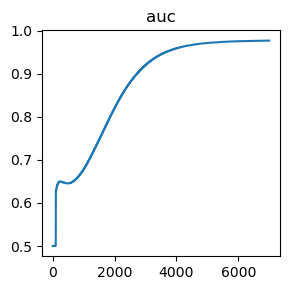



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9771184820939011


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:49:14 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 106,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


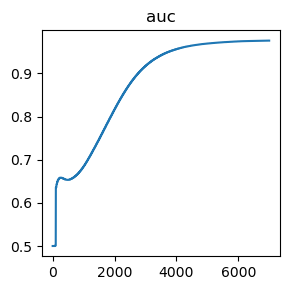



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.976064631915536


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:49:46 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 110,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


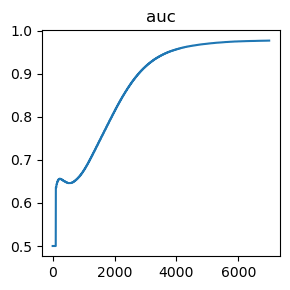



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9769661607856331


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:50:19 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 110,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


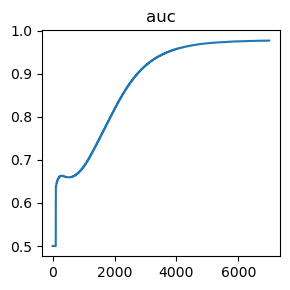



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.976593322627206


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:50:53 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 110,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


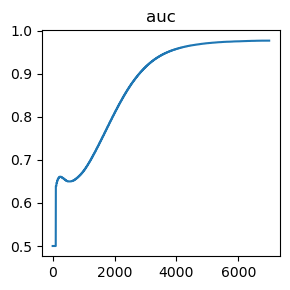



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9768610256648371


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:51:27 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 110,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


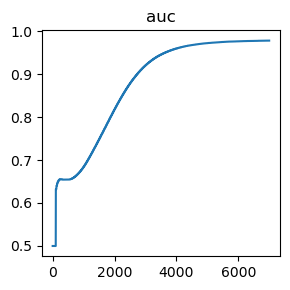



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9776957047284214


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:52:00 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 110,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


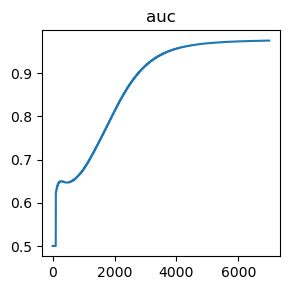



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.9755241068765721


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:312:::  
 2024-09-19 23:52:34 starting optimization of bigclam on photo on device cuda

 configs_dict: 
{
    "clamiter_init": {
        "dim_feat": 110,
        "dim_attr": 500,
        "s_reg": 0.0,
        "l1_reg": 1,
        "T": 1,
        "hidden_dim": 64,
        "num_coupling_blocks": 32,
        "num_layers_mlp": 2
    },
    "feat_opt": {
        "lr": 1e-06,
        "n_iter": 7000,
        "early_stop": 0
    }
}


/home/user/Documents/danny/AAAI_pieclam/experiments/../clamiter.py:369:::  
fit wrapper fit_feats, plotting state at iter 6999


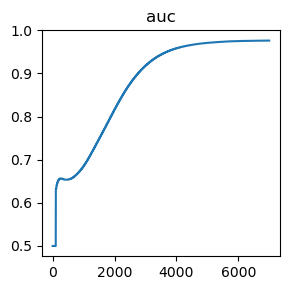



/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:427:::  


FINISHED train 
 last accuracies:
auc: 0.976280863716546


/home/user/Documents/danny/AAAI_pieclam/experiments/../trainer.py:433:::  





In [52]:
# VANILLA ARRS
dim_attrs = [50, 100, 150]
# dim_feats = [20, 26, 30, 36, 40, 46, 50, 56, 60, 66, 70]
dim_feats = [76, 80, 86, 90, 96, 100, 106, 110]
noise_amps = [0.1, 0.05, 0.01]
iters_prior = [1300, 2000, 1000]
iters_feat = [500, 1000, 2000]
lrs_feat = [0.00005, 0.000001, 0.000001]
lrs_prior = [0.00005, 0.000001, 0.000001]


for key in acc_dict.keys():
    for dim_feat in dim_feats:
        if dim_feat not in acc_dict[key].keys():
            acc_dict[key][dim_feat] = []
# acc_dict = {model_name: {dim_feat: [] for dim_feat in dim_feats} for model_name in ['bigclam', 'iegam']}

for model_name in ['iegam', 'bigclam']:
    for dim_feat in dim_feats:
        for _ in range(6):    
            photo_ds = import_dataset('photo')
            photo_ds.edge_index.shape

            dyads_to_omit = lp.get_dyads_to_omit(photo_ds.edge_index, 0.1)
            photo_ds_omitted = lp.omit_densify_split(
                                        photo_ds, 
                                        dyads_to_omit,
                                        val_rel_size=0.0,
                                        densify=False)


            # todo: make densification

            #todo: refactor acctracke
            #todo: anomaly detection before the algorithm. what to do with the anomalous nodes

            config_triplets = [
                ['clamiter_init', 'dim_feat', dim_feat],
                # ['prior_opt', 'lr', 0.000001],
                ['feat_opt', 'n_iter', 7000],
                ['back_forth','n_back_forth', 5]
                            ]

            trainer_photo_ieclam = Trainer(
                                    dataset=photo_ds_omitted,
                                    model_name=model_name,
                                    task='link_prediction',
                                    config_triplets_to_change=config_triplets,
                                    attr_opt=False,
                                    device=device,
            )

            # for link prediction we need to do the densification after omitting the dyads otherwise... otherwise we need to tell the omit dyads function... why not just do the omit dyads before trainer and have the dataset omitted. that will probably be the easiest and there will be no need for edge index original and all of that crap

            losses, acc_test, acc_val = trainer_photo_ieclam.train(
                        init_type='small_gaus',
                        init_feats=True,
                        acc_every=20,
                        plot_every=-1,
                        verbose=False,
                        verbose_in_funcs=False
                    )

            acc_dict[model_name][dim_feat].append(acc_test['auc'][-1])
            del photo_ds, photo_ds_omitted
            del trainer_photo_ieclam.data
            torch.cuda.empty_cache()

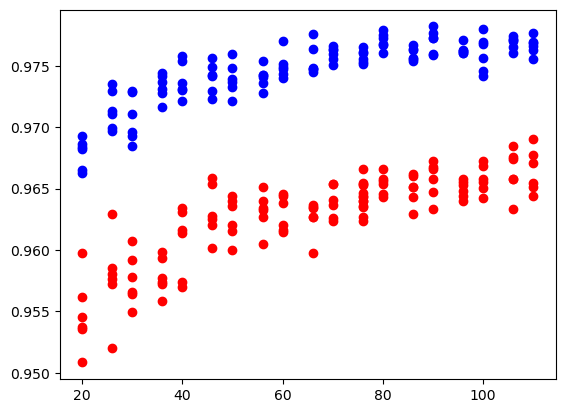

In [53]:
import matplotlib.pyplot as plt

# Extract the data for bigclam and iegam
bigclam_data = acc_dict['bigclam']
iegam_data = acc_dict['iegam']

# Plot the data
for key in bigclam_data.keys():
    for data in bigclam_data[key]:
        plt.plot(key,data,'o', color='blue', label='bigclam', linestyle='none')
for key in iegam_data.keys():
    for data in iegam_data[key]:
        plt.plot(key,data, 'o', color='red', label='iegam', linestyle='none')

# ithink maybe 40 for big and 80 for ie
    
    

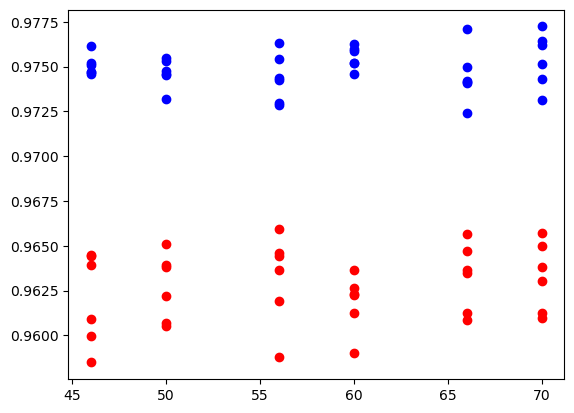

In [38]:
acc_dict
import matplotlib.pyplot as plt

# Extract the data for bigclam and iegam
bigclam_data = acc_dict['bigclam']
iegam_data = acc_dict['iegam']

# Plot the data
for key in bigclam_data.keys():
    plt.plot(dim_feats, bigclam_data[key], 'o', color='blue', label='bigclam', linestyle='none')
    plt.plot(dim_feats, iegam_data[key], 'o', color='red', label='iegam', linestyle='none')
    

# plt.plot(dim_feats, bigclam_data, color='blue', label='bigclam')
# plt.plot(dim_feats, iegam_data, color='red', label='iegam')

# # Add labels and title
# plt.xlabel('Dim Feat')
# plt.ylabel('AUC')
# plt.title('AUC vs Dim Feat')

# # Add legend
# plt.legend()

# # Show the plot
# plt.show()

In [25]:
acc_dict

{'bigclam': {36: [0.9727175209227668, 0.9723776342604988],
  40: [0.972267407076946, 0.9718492448404841],
  50: [0.9763531931124269, 0.9762211485460616]},
 'iegam': {36: [0.9655798708689162, 0.9567564327892888],
  40: [0.9570085710707769, 0.9578119610378143],
  50: [0.9598908052110603, 0.9617079782205947]}}

In [ ]:
#   'bigclam': {
#   10: [0.9585404724760899, 0.9639035086504821],
#   20: [0.9684866796298274, 0.9682561623880347],
#   30: [0.9715515773390894, 0.9679066481381807],
#   40: [0.973401410354128, 0.975028281881877]},
#  'iegam': {
#   10: [0.9363348119751429, 0.9362004879243281],
#   20: [0.953740656284433, 0.9519222289221715],
#   30: [0.9568455111402209, 0.9550952164216329],
#   40: [0.9605243983039492, 0.9610890825556342]}}